In [7]:

#Layyana Junaid 23k-0056 
#Task 1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("heart.csv")
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [2]:
data.isnull().sum()
data.dropna(inplace=True)
data.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:


X = data.drop('target', axis=1)  
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"X Train: {X_train}")
print("X Test:", X_test)

X Train: [[-1.23800345 -1.56826639 -0.91521848 ... -0.68583119 -0.71585998
   1.08857602]
 [ 1.45880461  0.63764677  0.99350601 ... -0.68583119 -0.71585998
   1.08857602]
 [ 1.45880461  0.63764677  0.99350601 ...  0.96273956  0.23861999
   1.08857602]
 ...
 [-0.37502487  0.63764677 -0.91521848 ...  0.96273956 -0.71585998
   1.08857602]
 [-1.23800345  0.63764677 -0.91521848 ...  0.96273956 -0.71585998
   1.08857602]
 [-0.26715255  0.63764677 -0.91521848 ...  0.96273956  0.23861999
  -0.56528428]]
X Test: [[ 0.81157068 -1.56826639 -0.91521848 ...  0.96273956 -0.71585998
  -0.56528428]
 [-0.15928023 -1.56826639  0.99350601 ...  0.96273956 -0.71585998
  -3.8730049 ]
 [ 0.05646442  0.63764677 -0.91521848 ... -0.68583119  0.23861999
   1.08857602]
 ...
 [ 1.56667694  0.63764677  0.99350601 ... -0.68583119  2.14757995
   1.08857602]
 [ 0.05646442  0.63764677 -0.91521848 ... -2.33440193 -0.71585998
   1.08857602]
 [-0.59076952  0.63764677  0.03914376 ...  0.96273956 -0.71585998
  -0.56528428]]

In [9]:

accuracies = []
for k in range(1, 251):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

max_accuracy = max(accuracies)
min_accuracy = min(accuracies)

max_k = accuracies.index(max_accuracy) + 1  
min_k = accuracies.index(min_accuracy) + 1  

print(f"Highest accuracy: {max_accuracy} with k = {max_k}")
print(f"Lowest accuracy: {min_accuracy} with k = {min_k}")


Highest accuracy: 0.9688109161793372 with k = 1
Lowest accuracy: 0.7953216374269005 with k = 150


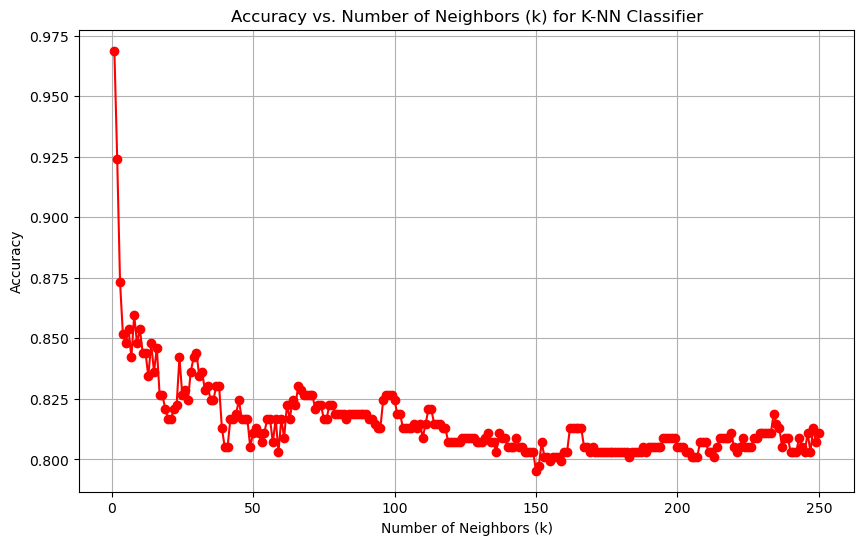

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 251), accuracies, marker='o', linestyle='-', color='lightpink')
plt.title('Accuracy vs. Number of Neighbors (k) for K-NN Classifier')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
